<a href="https://colab.research.google.com/github/HSE-LAMBDA/DeepGenerativeModels/blob/master/seminars/seminar-9/1.aae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install comet-ml

# import comet_ml in the top of your file
from comet_ml import Experiment
    
# Add the following code anywhere in your machine learning file
experiment = Experiment(api_key="lODeHEtCf7XLaV6DJrOfugNcA",
                        project_name="hse-gans-aae", workspace="holybayes")

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/holybayes/hse-gans-aae/2f0b2c25e56d43a29ef9ce1461f322fa



In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets

In [3]:
batch_size = 256

transform = transforms.Compose([
        transforms.CenterCrop(160),
        transforms.Scale(64),
        transforms.ToTensor(),
         #transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ])

dataset = datasets.CIFAR10('./data/',transform=transform,download=True)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=20, drop_last=True)

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:220: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


Files already downloaded and verified


In [0]:
cuda = True
cnt = 0
lr = 1e-4

nc = 3 # number of channels
nz = 64 # size of latent vector


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        ??? # WRITE YOUR CODE HERE

    def forward(self, x):
        ??? # WRITE YOUR CODE HERE

class Encoder(nn.Module):
    def __init__(self):
        ??? # WRITE YOUR CODE HERE

    def forward(self, x):
        ??? # WRITE YOUR CODE HERE

class Discriminator(nn.Module):
    def __init__(self):
        ??? # WRITE YOUR CODE HERE
    
    def forward(self, x):
        ??? # WRITE YOUR CODE HERE

Q = Encoder().to(device)
P = Decoder().to(device)
D = Discriminator().to(device)

def reset_grad():
    Q.zero_grad()
    P.zero_grad()
    D.zero_grad()

KeyboardInterrupt: ignored

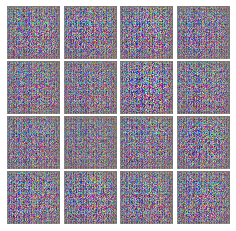

In [6]:
Q_optim = ??? # WRITE YOUR CODE HERE
P_optim = ??? # WRITE YOUR CODE HERE
D_optim = ??? # WRITE YOUR CODE HERE

for it in range(100000):

    for batch_idx, batch_item in enumerate(data_loader):
        #X = sample_X(mb_size)
        """ Reconstruction phase """
        X = batch_item[0].to(device)

        z_sample = Q(X)

        X_sample = P(z_sample)
        recon_loss = ??? # WRITE YOUR CODE HERE

        recon_loss.backward()
        P_optim.step()
        Q_optim.step()
        reset_grad()

        """ Regularization phase """
        # Discriminator
        for _ in range(5):
            z_real = torch.randn(batch_size, nz).to(device)
            
            z_fake = Q(X).view(batch_size,-1)

            D_real = D(z_real)
            D_fake = D(z_fake)

            D_loss =  ??? # WRITE YOUR CODE HERE

            D_loss.backward()
            D_optim.step()

            # Weight clipping
            for p in D.parameters():
                p.data.clamp_(-0.01, 0.01)

            reset_grad()

        # Generator
        z_fake = Q(X).view(batch_size,-1)
        D_fake = D(z_fake)

        #G_loss = -torch.mean(torch.log(D_fake))
        G_loss = -torch.mean(D_fake)

        G_loss.backward()
        Q_optim.step()
        reset_grad()

        experiment.log_metrics({'D_loss': D_loss.item(), 'G_loss': G_loss.item(), 'recon_loss': recon_loss.item()}, 
                               step=batch_idx, epoch=it)

        # Print and plot every now and then
        if batch_idx % 100 == 0:

            z_real = z_real.unsqueeze(2).unsqueeze(3) # add 2 dimensions
            if cnt % 2 == 0:
                samples = P(z_real) # Generated
            else:
                samples = X_sample # Reconstruction
            #samples = X_sample
            samples = samples.cpu()
            samples = samples.data.numpy()[:16]

            plt.figure(figsize=(4, 4))
            gs = gridspec.GridSpec(4, 4)
            gs.update(wspace=0.05, hspace=0.05)

            for i, sample in enumerate(samples):
                ax = plt.subplot(gs[i])
                plt.axis('off')
                ax.set_xticklabels([])
                ax.set_yticklabels([])
                ax.set_aspect('equal')
                sample = np.swapaxes(sample,0,2)
                plt.imshow(sample)

            experiment.log_figure('samples', figure=plt, step=cnt)
            
            cnt += 1